## JBL Speaker Reviews Dataset Analysis and Visualization

In this notebook, the reviews from Amazon on JBL Speaker were analyzed and visualized.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Data Preparation and Visualization:


In [91]:
#reading the sqlite file and making a df from the data
con = sqlite3.connect("Amazon.sqlite")
df = pd.read_sql_query("SELECT * from JLB", con)

In [92]:
#Showing the head of the dataset
df.head()

,rating,date,location,color,review_title,review,comment
0,1.0,January-29-2019,United States,Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11
1,3.0,December-12-2018,United States,Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3
2,5.0,October-26-2018,United States,Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1
3,5.0,June-3-2019,United States,Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2
4,4.0,December-5-2018,United States,Red,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,1


In [93]:
df.shape

(1652, 7)

Checking to see if there is any null data in our dataset:

In [94]:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment
1651,5.0,June-4-2019,United States,None,None,None,None


Removing the row with null values:

In [95]:
df.reset_index()
df.dropna()
df.drop_duplicates()
df = df.mask(df.eq('None')).dropna()

In [96]:
#checking again for null values in the dataset
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment


Converting the rating and comment values to numerical:

In [97]:
#converting the data to numerical
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['comment'] = pd.to_numeric(df['comment'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

Adding an extra column for feedback. Here feedback means the review has received one or more comments. Those with comments  (1) and those with no comments (0):

In [98]:
df['feedback'] = np.where(df['comment'] > 0, 1, 0)

Plotting the distribution of the ratings for JBL Speaker in the dataset:

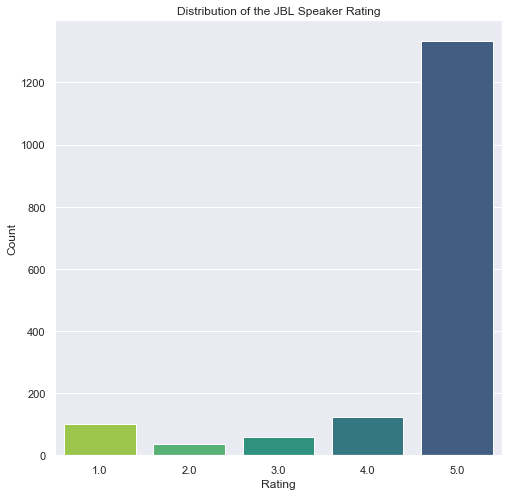

In [99]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['rating'],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Distribution of the JBL Speaker Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.savefig('1.png')

Plotting the feedback verus the number of ratings (What rating and how many of each have the reviews with feedback and without feedback received):

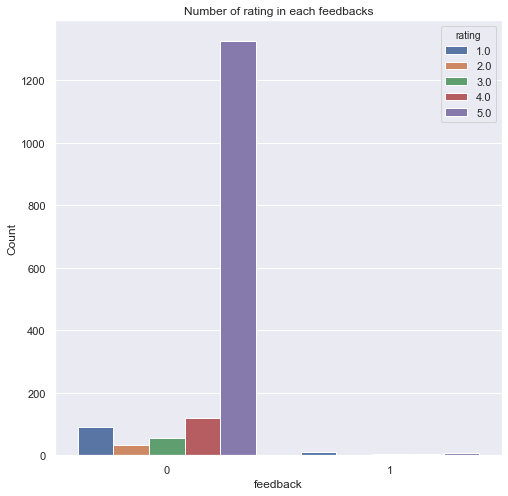

In [100]:
plt.figure(figsize=(8,8))
count = (df.groupby(['feedback']))['rating'].value_counts()\
.reset_index(name = "Count")
sns.barplot(x = "feedback", y = "Count", hue = "rating", data = count)\
.set_title("Number of rating in each feedbacks")
plt.savefig('2.png')

Determining the number of ratings (by star):

In [101]:
df.groupby(['rating'])['rating'].count()

rating
1.0     100
2.0      35
3.0      60
4.0     123
5.0    1333
Name: rating, dtype: int64

Plotting the different ratings (1-5) for different colors of the JBL Speaker:

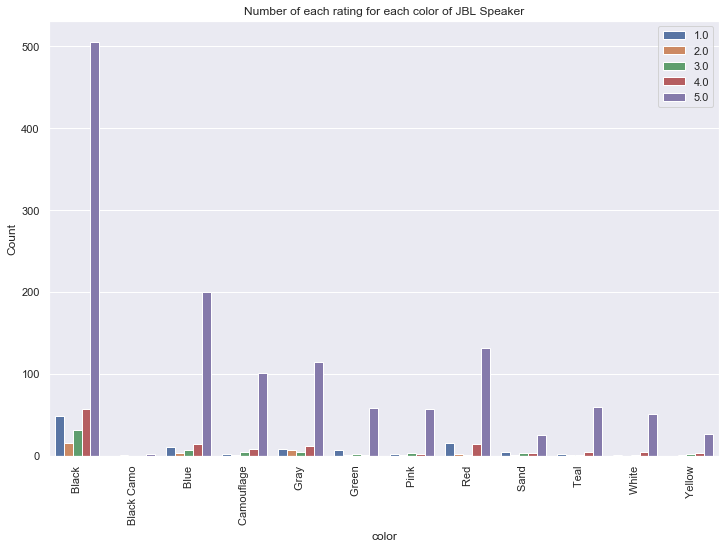

In [102]:
plt.figure(figsize=(12,8))
count = (df.groupby(['color']))['rating'].value_counts()\
.reset_index(name = "Count")
sns.barplot(x = "color", y = "Count", hue = "rating", data = count)\
.set_title("Number of each rating for each color of JBL Speaker")
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.savefig('3.png')
plt.show()

As the majority of ratings are 5, the dataset will be biased towards rating 5. We cn divide our dataset into reviews with rating 5 and the rest. We call the reviews with rating 5 the group "awsome" and the other group "not so awsome". This will reduce the bias to some extent.

In [103]:
df.groupby('rating').count()
df['awesome'] = 0
df.loc[df['rating'] ==5, 'awesome'] = 1

y = df['awesome'].values
df.groupby(['awesome'])['awesome'].count()

awesome
0     318
1    1333
Name: awesome, dtype: int64

Plotting the number of awsome reviews and not so awsome reviews for different colors of the JBL Speaker:

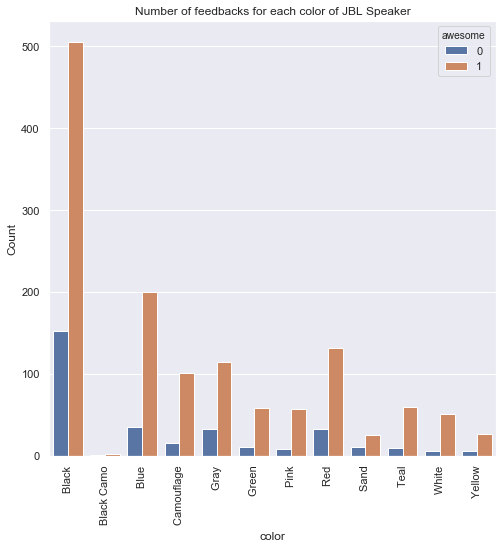

In [104]:
plt.figure(figsize=(8,8))
count = (df.groupby(['color']))['awesome'].value_counts()\
.reset_index(name = "Count")
sns.barplot(x = "color", y = "Count", hue = "awesome", data = count)\
.set_title("Number of feedbacks for each color of JBL Speaker")
plt.xticks(rotation = 90)
plt.savefig('4.png')
plt.show()

Plotting the distribution of difrenet color in JBL speakers reviewed in dataset:

In [105]:
df['color'].nunique()

12

In [106]:
df.isna().sum()

rating          0
date            0
location        0
color           0
review_title    0
review          0
comment         0
feedback        0
awesome         0
dtype: int64

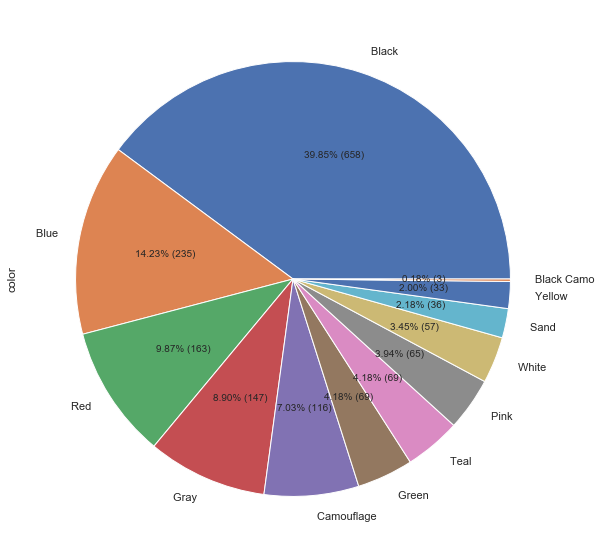

In [107]:
#Plotting the distribution of colors of speaker in the dataset using matplotlip
plt.figure(figsize=(10,10))
total = df['color'].value_counts().sum()
df['color'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('5.png')

Here we will add a new column as "good" which will correspond to the ratings better than 3 (1). The other group with ratings below 3 (0) will be called "not so good".

In [108]:
df.groupby('rating').count()
df['good'] = 0
df.loc[df['rating'] >=3, 'good'] = 1

y = df['good'].values
df.groupby(['good'])['good'].count()

good
0     135
1    1516
Name: good, dtype: int64

In [109]:
df.sample(10)

,rating,date,location,color,review_title,review,comment,feedback,awesome,good
362,3.0,December-26-2019,United States,Red,This is a MONO speaker,The Charge 4 has ONE speaker in the front left...,0,0,0,1
8,1.0,January-29-2019,United States,Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11,1,0,0
1183,5.0,January-19-2020,United States,Gray,Great portable speaker!!,Great sounds. Long battery life.,0,0,1,1
312,5.0,April-23-2020,United States,Black,Great speaker and sound!,Husband got this to replace an OLD portable Bo...,0,0,1,1
448,5.0,August-30-2019,United States,Black,Great little speaker.,Bought this to use around our pool! Great soun...,0,0,1,1
1317,5.0,May-26-2019,United States,Black,I would buy,All around solid. Best $120 dollar investment ...,0,0,1,1
1212,1.0,September-11-2019,United States,Black,It doesn’t charge anymore after 5 months of new .,Charging problems I just got this 5 months ago...,0,0,0,0
349,5.0,July-8-2019,United States,Teal,Highly recommend,Love it! You should get one! Great battery lif...,0,0,1,1
1131,5.0,July-2-2019,United States,Camouflage,Me gusta,Me gusta el sonido,0,0,1,1
399,5.0,July-31-2019,United States,Red,"Quality speaker, good price.",Probably the best Bluetooth speaker on the mar...,0,0,1,1


Performing some statistical analysis on the data:

In [110]:
df.describe(include='all')

,rating,date,location,color,review_title,review,comment,feedback,awesome,good
count,1651.000000,1651,1651,1651,1651,1651,1651.000000,1651.000000,1651.000000,1651.000000
unique,NaN,447,1,12,1310,1541,NaN,NaN,NaN,NaN
top,NaN,January-2-2020,United States,Black,Great speaker,Love it,NaN,NaN,NaN,NaN
freq,NaN,20,1651,658,27,12,NaN,NaN,NaN,NaN
mean,4.546941,NaN,NaN,NaN,NaN,NaN,0.039976,0.016354,0.807389,0.918231
std,1.084075,NaN,NaN,NaN,NaN,NaN,0.464080,0.126870,0.394469,0.274095
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.000000
50%,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.000000
75%,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.000000


In [111]:
df.groupby('good').describe()

rating                                              comment            \
       count      mean       std  min  25%  50%  75%  max   count      mean   
good                                                                          
0      135.0  1.259259  0.439860  1.0  1.0  1.0  2.0  2.0   135.0  0.259259   
1     1516.0  4.839710  0.462487  3.0  5.0  5.0  5.0  5.0  1516.0  0.020449   

      ... feedback      awesome                                             
      ...      75%  max   count      mean     std  min  25%  50%  75%  max  
good  ...                                                                   
0     ...      0.0  1.0   135.0  0.000000  0.0000  0.0  0.0  0.0  0.0  0.0  
1     ...      0.0  1.0  1516.0  0.879288  0.3259  0.0  1.0  1.0  1.0  1.0  

[2 rows x 32 columns]

According to the table above most of the users are satisfied with the JLB Speaker.

Here we will add a new column to our dataframe and will check the length of the reviews:

In [112]:
#Adding a new column and entering the length of the reviews:
df['length_of_review'] = df['review'].apply(len)
df.head()

,rating,date,location,color,review_title,review,comment,feedback,awesome,good,length_of_review
0,1.0,January-29-2019,United States,Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11,1,0,0,345
1,3.0,December-12-2018,United States,Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3,1,0,1,238
2,5.0,October-26-2018,United States,Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1,1,1,1,531
3,5.0,June-3-2019,United States,Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2,1,1,1,2636
4,4.0,December-5-2018,United States,Red,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,1,1,0,1,614


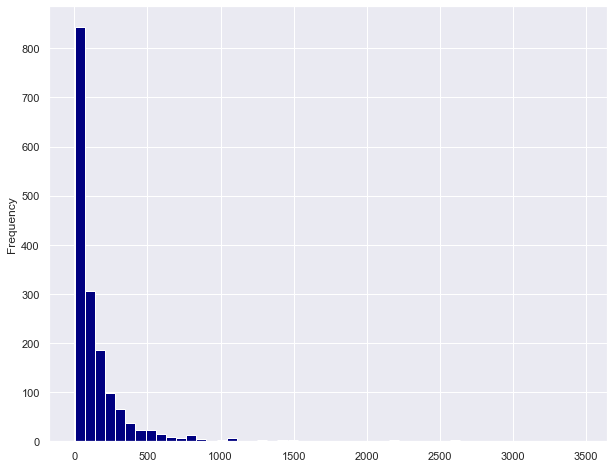

In [113]:
#Plotting the histogram of the length of reviews
plt.figure(figsize=(10,8))
df['length_of_review'].plot(bins=50, kind='hist', color='navy');
plt.savefig('6.png')

The Distribution Plot above, illustrates a distribution of Length of the Reviews written by buyers for JBL Speaker. Most of the Reviews are between 0 to 500 words.

In [114]:
#Describing the data according to the length of reviews
df.groupby('length_of_review').describe().sample(10)

rating                                           comment  \
                  count  mean       std  min   25%  50%  75%  max   count   
length_of_review                                                            
161                 3.0  5.00  0.000000  5.0  5.00  5.0  5.0  5.0     3.0   
269                 1.0  5.00       NaN  5.0  5.00  5.0  5.0  5.0     1.0   
475                 1.0  2.00       NaN  2.0  2.00  2.0  2.0  2.0     1.0   
259                 1.0  5.00       NaN  5.0  5.00  5.0  5.0  5.0     1.0   
207                 4.0  4.75  0.500000  4.0  4.75  5.0  5.0  5.0     4.0   
174                 3.0  5.00  0.000000  5.0  5.00  5.0  5.0  5.0     3.0   
371                 1.0  5.00       NaN  5.0  5.00  5.0  5.0  5.0     1.0   
326                 1.0  5.00       NaN  5.0  5.00  5.0  5.0  5.0     1.0   
638                 1.0  3.00       NaN  3.0  3.00  3.0  3.0  3.0     1.0   
127                 3.0  4.00  1.732051  2.0  3.50  5.0  5.0  5.0     3.0   

                       ... awesome       good                               \
                 mean  ...     75%  max count      mean      std  min  25%   
length_of_review       ...                                                   
161               0.0  ...     1.0  1.0   3.0  1.000000  0.00000  1.0  1.0   
269               0.0  ...     1.0  1.0   1.0  1.000000      NaN  1.0  1.0   
475               0.0  ...     0.0  0.0   1.0  0.000000      NaN  0.0  0.0   
259               0.0  ...     1.0  1.0   1.0  1.000000      NaN  1.0  1.0   
207               0.0  ...     1.0  1.0   4.0  1.000000  0.00000  1.0  1.0   
174               0.0  ...     1.0  1.0   3.0  1.000000  0.00000  1.0  1.0   
371               1.0  ...     1.0  1.0   1.0  1.000000      NaN  1.0  1.0   
326               0.0  ...     1.0  1.0   1.0  1.000000      NaN  1.0  1.0   
638               0.0  ...     0.0  0.0   1.0  1.000000      NaN  1.0  1.0   
127               0.0  ...     1.0  1.0   3.0  0.666667  0.57735  0.0  0.5   

                                 
                  50%  75%  max  
length_of_review                 
161               1.0  1.0  1.0  
269               1.0  1.0  1.0  
475               0.0  0.0  0.0  
259               1.0  1.0  1.0  
207               1.0  1.0  1.0  
174               1.0  1.0  1.0  
371               1.0  1.0  1.0  
326               1.0  1.0  1.0  
638               1.0  1.0  1.0  
127               1.0  1.0  1.0  

[10 rows x 40 columns]

Here we will plot the histograms of the length of reviews for "good" ratings and "not so good" ratings to see if there is a difference:

<Figure size 720x720 with 0 Axes>

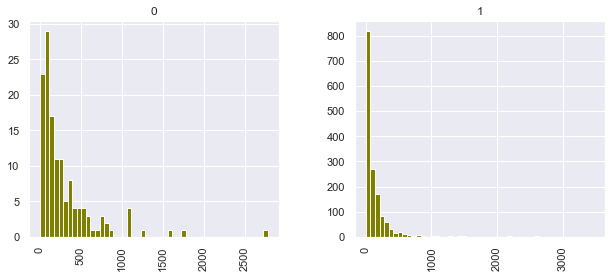

In [115]:
plt.figure(figsize=(10,10))
df.hist(column='length_of_review', by='good', bins=50,figsize=(10,4), color='olive');
plt.savefig('7.png')

Unsatisfied buyers have written longer sentences when reviewing the product.

Here in a Pie Chart the percentage of satisfied versus unsatisfid people with the Coffee Maker will be depicted.

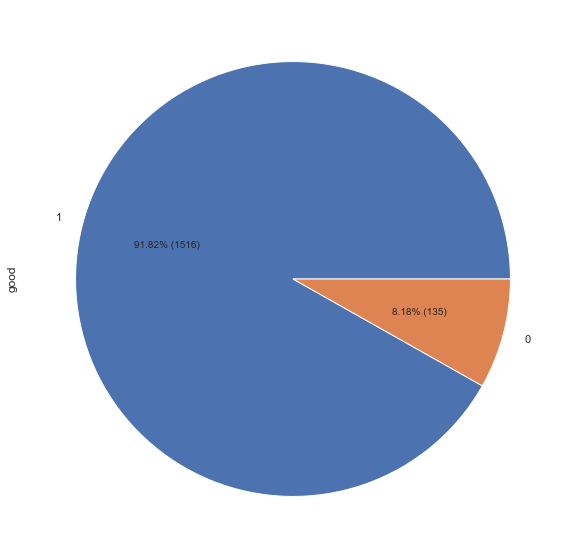

In [116]:
#Plotting the distribution of ratings of speaker in the dataset using matplotlip
plt.figure(figsize=(10,10))
total = df['good'].value_counts().sum()
df['good'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))
plt.savefig('8.png')
                              

In the pie chart above it can be observed that over 90 % of the buyers have given good ratings (3 star or above) and below 9 % have been unsatisfied.

Plotting the average length of reviews versus the ratings. Here we will see for each rating (1-5) what the average length of the reviews is:

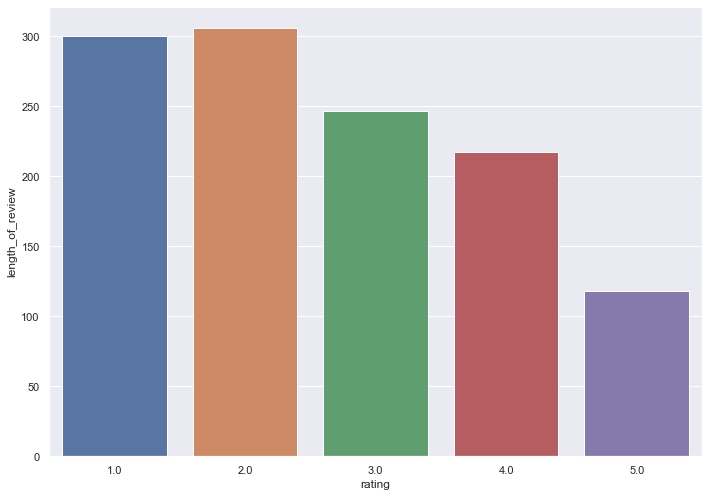

In [117]:
#plotting average length of review versus rating
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='rating', y='length_of_review', data=df, ci=None)
plt.savefig('9.png')

The bar plot above shows again that unsatisfied people have written longer reviews.

Plotting the average length of reviews versus the number of comments that they have received:

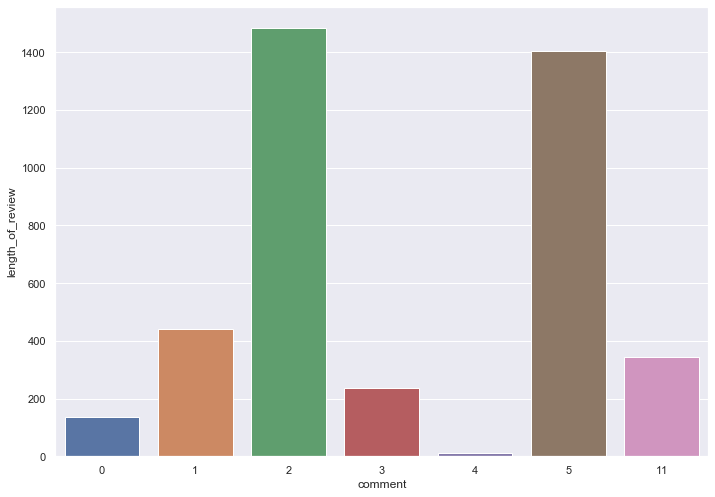

In [118]:
#plotting average length of review versus rating
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='comment', y='length_of_review', data=df, ci=None)
plt.savefig('10.png')

As the above plot illustrates and as expected, there is no clear relationship between the number of comments and the length of reviews.

Plotting the average number of comments versus ratings:

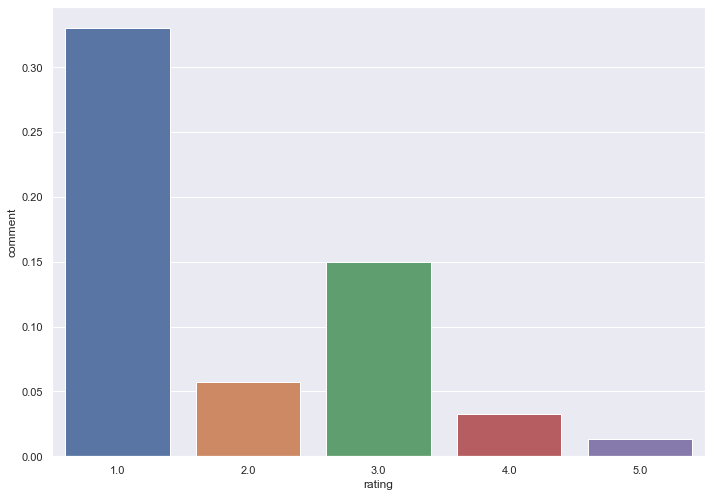

In [119]:
#plotting average number of comments versus rating
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='rating', y='comment', data=df, ci=None)
plt.savefig('11.png')

As shown in the above plot, the lowest rating (1) has themost number of comments as well and the least number of comments belong to the best reviews (awsome reviews) i.e. 5.

Plotting the average length of reviews versus the color of the speaker:

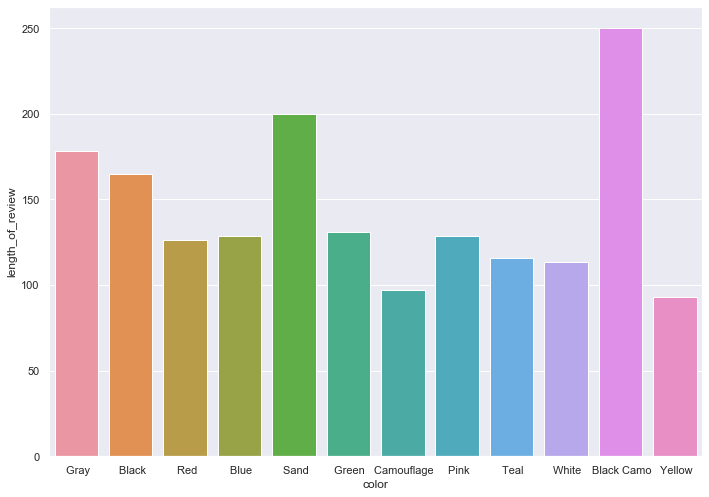

In [120]:
#plotting average length 0f reviews versus color
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='color', y='length_of_review', data=df, ci=None)
plt.savefig('12.png')

As expected no clear relationship between the color and length of review. Black Camo has received the longest reviews.

Plotting the average number of comments versus the color of the speaker:

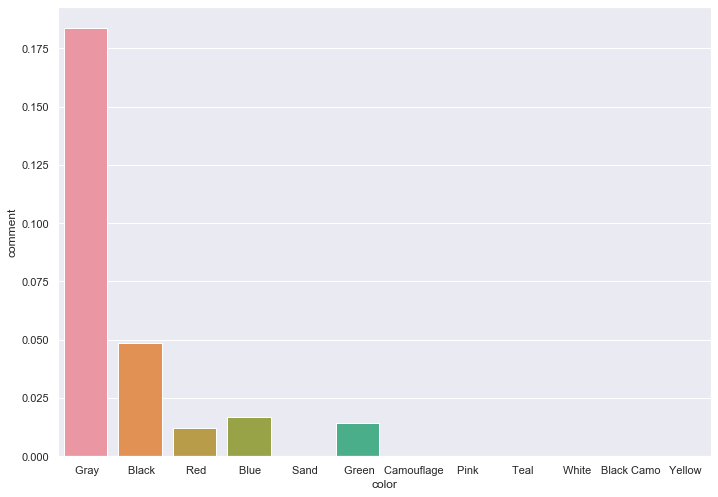

In [121]:
#plotting average number of comments versus color
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='color', y='comment', data=df, ci=None)
plt.savefig('13.png')

As expected no relationship between the color and the number of comments however, reviews for gray speakers have received more number of comments and for many colors no comment has been left.

The cleaned and prepared dataset is saved as a sqlite file:

In [123]:
#saving the dataframe as a sqlite file
conn = sqlite3.connect('Amazon.sqlite')
df.to_sql('JLBcleaned', conn, if_exists='replace', index=False)